Silicon nano-sphere
============================
*01/2021: updated to pyGDM v1.1+*

Comparing pyGDM to Mie theory for a silicon nano-sphere (D=150nm).

Modules:

In [1]:
from pyGDM2 import structures
from pyGDM2 import materials
from pyGDM2 import fields

from pyGDM2 import core
from pyGDM2 import propagators
from pyGDM2 import tools
from pyGDM2 import linear
from pyGDM2 import visu

import numpy as np
import matplotlib.pyplot as plt


## --- load pre-calculated Mie-data
wl_mie, qext_mie, qsca_mie = np.loadtxt("scat_mie_Si_D150nm.txt").T
qabs_mie = qext_mie - qsca_mie

Simulation setup
--------------------

structure initialization - automatic mesh detection: hex
structure initialization - consistency check: 1159/1159 dipoles valid


/home/hans/.local/lib/python3.8/site-packages/pyGDM2/visu.py:49: UserWarning: 3D data. Falling back to XY projection...
  warnings.warn("3D data. Falling back to XY projection...")


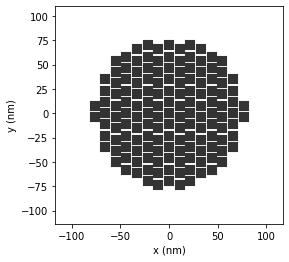

(hex) ----- N_dipoles = 1159

In [2]:
## --- Setup incident field
field_generator = fields.planewave
## log-interval spectrum (denser at low lambda):
wavelengths = np.exp(np.linspace(np.log(300), np.log(1000), 50))
kwargs = dict(theta = [0.0])
efield = fields.efield(field_generator, wavelengths=wavelengths, 
                                                   kwargs=kwargs)

scale_factor = 1.4
step = 18.75/scale_factor
radius = 4.*scale_factor
geometry = structures.sphere(step, R=radius, mesh='hex', ORIENTATION=2)
material = materials.silicon()
struct = structures.struct(step, geometry, material)

dyads = propagators.DyadsQuasistatic123(n1=1, n2=1)

sim = core.simulation(struct, efield, dyads)

visu.structure(sim)
print('(hex) ----- N_dipoles =', len(sim.struct.geometry), end='')

Run the simulation
--------------------------

In [3]:
## main simulation
E = core.scatter(sim, method='lu', verbose=True)

## extinction spectrum
field_kwargs = tools.get_possible_field_params_spectra(sim)[0]
wl, spec = tools.calculate_spectrum(sim, field_kwargs, linear.extinct)
a_ext, a_sca, a_abs = spec.T
a_geo = tools.get_geometric_cross_section(sim)

/home/hans/.local/lib/python3.8/site-packages/numba/core/dispatcher.py:237: UserWarning: Numba extension module 'numba_scipy' failed to load due to 'ValueError(No function '__pyx_fuse_0pdtr' found in __pyx_capi__ of 'scipy.special.cython_special')'.
  entrypoints.init_all()


timing for wl=300.00nm - setup: EE 8901.2ms, inv.: 5052.6ms, repropa.: 1758.7ms (1 field configs), tot: 15713.7ms
timing for wl=307.46nm - setup: EE 298.4ms, inv.: 2397.7ms, repropa.: 19.7ms (1 field configs), tot: 2716.5ms
timing for wl=315.11nm - setup: EE 289.7ms, inv.: 1979.9ms, repropa.: 18.3ms (1 field configs), tot: 2288.7ms
timing for wl=322.95nm - setup: EE 227.4ms, inv.: 1898.8ms, repropa.: 13.3ms (1 field configs), tot: 2140.1ms
timing for wl=330.98nm - setup: EE 253.0ms, inv.: 2455.0ms, repropa.: 27.5ms (1 field configs), tot: 2737.1ms
timing for wl=339.22nm - setup: EE 787.0ms, inv.: 4580.3ms, repropa.: 36.4ms (1 field configs), tot: 5405.1ms
timing for wl=347.65nm - setup: EE 769.3ms, inv.: 5904.0ms, repropa.: 31.0ms (1 field configs), tot: 6706.5ms
timing for wl=356.30nm - setup: EE 848.0ms, inv.: 3236.1ms, repropa.: 13.5ms (1 field configs), tot: 4098.4ms
timing for wl=365.17nm - setup: EE 223.5ms, inv.: 1788.3ms, repropa.: 16.5ms (1 field configs), tot: 2029.4ms
timing

Plot the spectrum
---------------------------

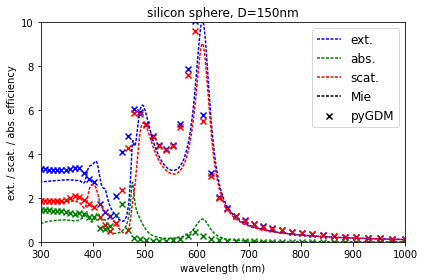

In [4]:
plt.figure()
plt.title("silicon sphere, D=150nm")

## --- Mie
plt.plot(wl_mie, qext_mie, 'b--', dashes=[2,1],label='ext.')
plt.plot(wl_mie, qabs_mie, 'g--', dashes=[2,1],label='abs.')
plt.plot(wl_mie, qsca_mie, 'r--', dashes=[2,1],label='scat.')

## --- pyGDM
plt.scatter(wl, a_ext/a_geo, marker='x', linewidth=1.5, color='b', label='')
plt.scatter(wl, a_abs/a_geo, marker='x', linewidth=1.5, color='g', label='')
plt.scatter(wl, a_sca/a_geo, marker='x', linewidth=1.5, color='r', label='')

## --- for legend only
plt.plot([0], [0], 'k--', dashes=[2,1], label='Mie')
plt.scatter([0], [0], marker='x', linewidth=1.5, color='k', label='pyGDM')
## -- legend
plt.legend(loc='best', fontsize=12)


plt.xlabel("wavelength (nm)")
plt.ylabel("ext. / scat. / abs. efficiency")
plt.xlim( [wl.min(), wl.max()] )
plt.ylim( [0, 10] )


plt.tight_layout()
plt.show()

The agreement with Mie theory is ok but not ideal. This can be easily improved by increasing the number of meshpoints (see our paper), which increases of course the simulation time, for which reason we stick to a coarser mesh for this demonstration.